5. Метеоритная защита земли

In [8]:
import numpy as pd
import pandas as pd
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
N1_df = pd.read_csv('cneos_fireball_data.csv')
N1_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.

In [10]:
maxEn = N1_df[N1_df["Total Radiated Energy (J)"] == N1_df["Total Radiated Energy (J)"].max()]
maxEn

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
146,2013-02-15 03:20:33,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0


In [17]:
print('широта -', list(maxEn['Latitude (deg.)'])[0])
print('долгота -', list(maxEn['Longitude (deg.)'])[0])
print('высота -', list(maxEn['Altitude (km)'])[0],'km')

широта - 54.8N
долгота - 61.1E
высота - 23.3 km


2. Определите метеорит с максимальной и минимальной скоростью.

In [60]:
maxV = N1_df[N1_df["Velocity (km/s)"] == N1_df["Velocity (km/s)"].max()]
maxV

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


In [62]:
print('максимальная скорость -', list(maxV['Velocity (km/s)'])[0],'km/s')

максимальная скорость - 49.0 km/s


In [63]:
minV = N1_df[N1_df["Velocity (km/s)"] == N1_df["Velocity (km/s)"].min()]
minV

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


In [65]:
print('минимальная скорость -', list(minV['Velocity (km/s)'])[0],'km/s')

минимальная скорость - 9.8 km/s


3. Определите место максимальной концентрации метеоритов.

In [90]:
N1_df.dropna(subset = ['Latitude (deg.)', 'Longitude (deg.)'], inplace = True)
N1_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [105]:
lat = list(N1_df['Latitude (deg.)'].apply(lambda x: x[-1]))
long = list(N1_df['Longitude (deg.)'].apply(lambda x: x[-1]))
coord = {'N-E':0, 'N-W':0, 'S-E':0, 'S-W':0}
for x,y in zip(lat, long):
    coord[x+'-'+y] +=1
print(coord)

{'N-E': 138, 'N-W': 126, 'S-E': 149, 'S-W': 126}


4. Определите время года, в которое вероятность появления метеоритов максимальна. Постойте график

In [120]:
N1_df = pd.read_csv('cneos_fireball_data.csv')
VrG_dict = {1:'winter',2:'winter',3:'spring',4:'spring',5:'spring',6:'summer',7:'summer',8:'summer',9:'autumn',10:'autumn',11:'autumn',12:'winter'}
VrG = N1_df['Peak Brightness Date/Time (UT)'].apply(lambda x: VrG_dict[datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month])
N1_df.insert(0,'seasons', VrG)
N1_df

,seasons,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,summer,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,summer,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,summer,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,summer,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,summer,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...,...
714,autumn,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,autumn,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,autumn,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,autumn,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [125]:
print(N1_df['seasons'].value_counts(),'\n')
print('Время года:', N1_df['seasons'].value_counts().index[0])

autumn    182
spring    180
winter    179
summer    178
Name: seasons, dtype: int64 

Время года: autumn


<AxesSubplot:xlabel='Время года', ylabel='Частота появления метеоритов'>

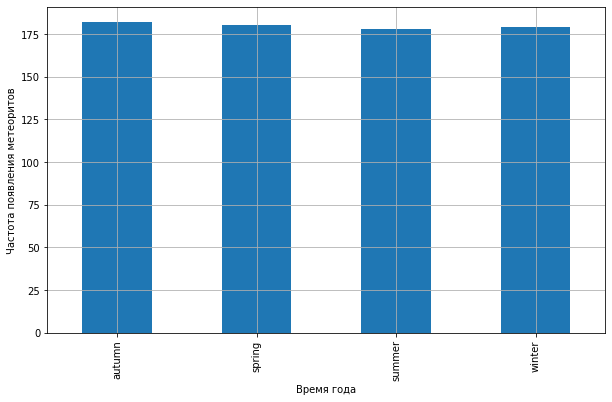

In [129]:
N1_df.groupby('seasons').count()['Peak Brightness Date/Time (UT)'].plot(figsize = (10,6), kind = 'bar', xlabel = 'Время года', ylabel = 'Частота появления метеоритов', grid = True)

5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.

In [143]:
N1_df = pd.read_csv('cneos_fireball_data.csv')
print('Размер до удаления:', N1_df.shape)
N1_df.drop(N1_df[(N1_df['Velocity (km/s)'].isnull())].index, inplace = True)
print('Размер после удаления:', N1_df.shape)

Размер до удаления: (719, 10)
Размер после удаления: (157, 10)


6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.

<AxesSubplot:xlabel='Время года', ylabel='Частота появления метеоритов'>

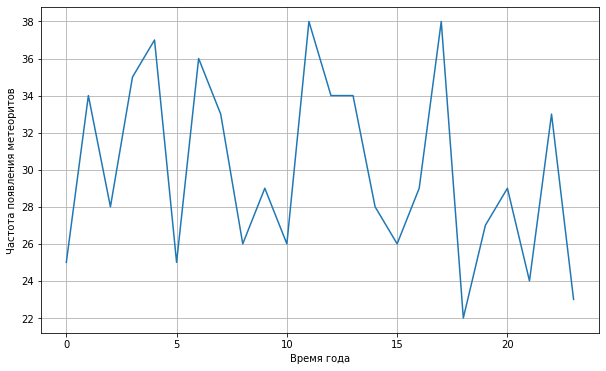

In [150]:
N1_df = pd.read_csv('cneos_fireball_data.csv')
time = N1_df['Peak Brightness Date/Time (UT)'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
N1_df.insert(0,'Time', time)
N1_df.groupby('Time').count()['Peak Brightness Date/Time (UT)'].plot(figsize = (10,6), xlabel = 'Время года', ylabel = 'Частота появления метеоритов', grid = True)

7. Заполните строки в которых для метеоритов не указана скорость.

In [153]:
N1_df = pd.read_csv('cneos_fireball_data.csv')
neykV = N1_df['Velocity (km/s)'].fillna('-')
neykV.reset_index()

,index,Velocity (km/s)
0,0,-
1,1,17.2
2,2,13.7
3,3,15.2
4,4,24.3
...,...,...
714,714,-
715,715,-
716,716,-
717,717,-


8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).

In [156]:
time = N1_df['Peak Brightness Date/Time (UT)'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
time

0       7
1       7
2       7
3       6
4       6
       ..
714    11
715    10
716    10
717    10
718     4
Name: Peak Brightness Date/Time (UT), Length: 719, dtype: int64

In [159]:
N1_df.insert(0,'month', time)
N1_df

,month,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Month
0,7,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190,7
1,7,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120,7
2,7,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230,7
3,6,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290,6
4,6,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520,6
...,...,...,...,...,...,...,...,...,...,...,...,...
714,11,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,11
715,10,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,10
716,10,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,10
717,10,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,10


In [160]:
time = N1_df.groupby('month')['Peak Brightness Date/Time (UT)'].count()
time = pd.DataFrame(time)
time.reset_index()

,month,Peak Brightness Date/Time (UT)
0,1,60
1,2,61
2,3,61
3,4,63
4,5,56
5,6,59
6,7,60
7,8,59
8,9,52
9,10,65


<function matplotlib.pyplot.show(close=None, block=None)>

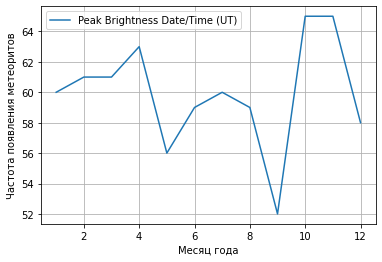

In [167]:
time.plot(stacked = 'True', xlabel = 'Месяц года', ylabel = 'Частота появления метеоритов', grid = True)
plt.show

9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [169]:
N1_df.dropna(subset = ['Altitude (km)'], inplace = True)
Kor = N1_df[['Altitude (km)','Total Radiated Energy (J)']]
Kor

,Altitude (km),Total Radiated Energy (J)
1,38.0,3.500000e+10
2,35.0,7.300000e+10
3,20.0,9.400000e+10
4,35.1,1.840000e+11
5,33.3,6.360000e+11
...,...,...
600,69.0,1.240000e+11
610,32.0,5.060000e+12
613,65.0,3.500000e+10
626,30.0,7.400000e+10


In [172]:
coef_corr_pearson, p_vaule_pearson = stats.pearsonr(Kor['Altitude (km)'],Kor['Total Radiated Energy (J)'])
coef_corr_spearman, p_vaule_spearman = stats.spearmanr(Kor['Altitude (km)'],Kor['Total Radiated Energy (J)'])
print(f'К/ф корреляции Пирсона:, {coef_corr_pearson}, p_vaule:, {p_vaule_pearson}')
print(f'К/ф корреляции Пирсона:, {coef_corr_spearman}, p_vaule:, {p_vaule_spearman}')

К/ф корреляции Пирсона:, -0.08578656525823586, p_vaule:, 0.13368269878711372
К/ф корреляции Пирсона:, -0.12671041939219074, p_vaule:, 0.026415728610676672


C:\Program Files (x86)\Winpython\WPy64-3870\python-3.8.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Altitude (km)', ylabel='Density'>

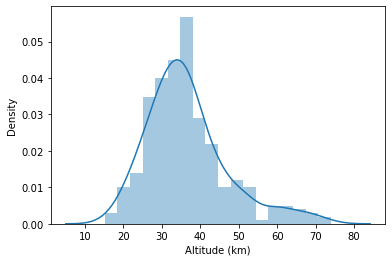

In [173]:
sns.distplot(Kor['Altitude (km)'])

C:\Program Files (x86)\Winpython\WPy64-3870\python-3.8.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Radiated Energy (J)', ylabel='Density'>

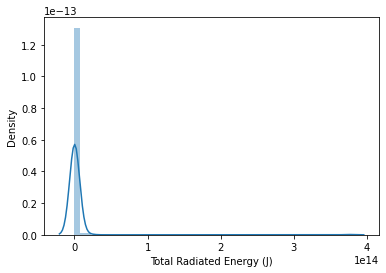

In [174]:
sns.distplot(Kor['Total Radiated Energy (J)'])